In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
from xgboost.sklearn import XGBClassifier

In [2]:
df=pd.read_excel('preprocessed_data.xlsx')

In [3]:
df.drop(df.loc[df['language']!='en'].index, inplace=True)

In [89]:
df.shape

(7961, 14)

In [136]:
c = df.group.value_counts()
c = c[c < 100].index
print(c)
print(df.group.nunique() - len(c)+1)

Index(['GRP_29', 'GRP_25', 'GRP_18', 'GRP_16', 'GRP_17', 'GRP_7', 'GRP_31',
       'GRP_26', 'GRP_34', 'GRP_40', 'GRP_41', 'GRP_15', 'GRP_20', 'GRP_28',
       'GRP_45', 'GRP_33', 'GRP_1', 'GRP_22', 'GRP_21', 'GRP_47', 'GRP_11',
       'GRP_30', 'GRP_23', 'GRP_60', 'GRP_39', 'GRP_62', 'GRP_27', 'GRP_37',
       'GRP_44', 'GRP_36', 'GRP_50', 'GRP_48', 'GRP_53', 'GRP_65', 'GRP_55',
       'GRP_52', 'GRP_51', 'GRP_42', 'GRP_59', 'GRP_46', 'GRP_43', 'GRP_66',
       'GRP_56', 'GRP_68', 'GRP_38', 'GRP_49', 'GRP_63', 'GRP_58', 'GRP_54',
       'GRP_69', 'GRP_71', 'GRP_72', 'GRP_57', 'GRP_32', 'GRP_67', 'GRP_73',
       'GRP_35', 'GRP_70', 'GRP_61', 'GRP_64'],
      dtype='object')
15


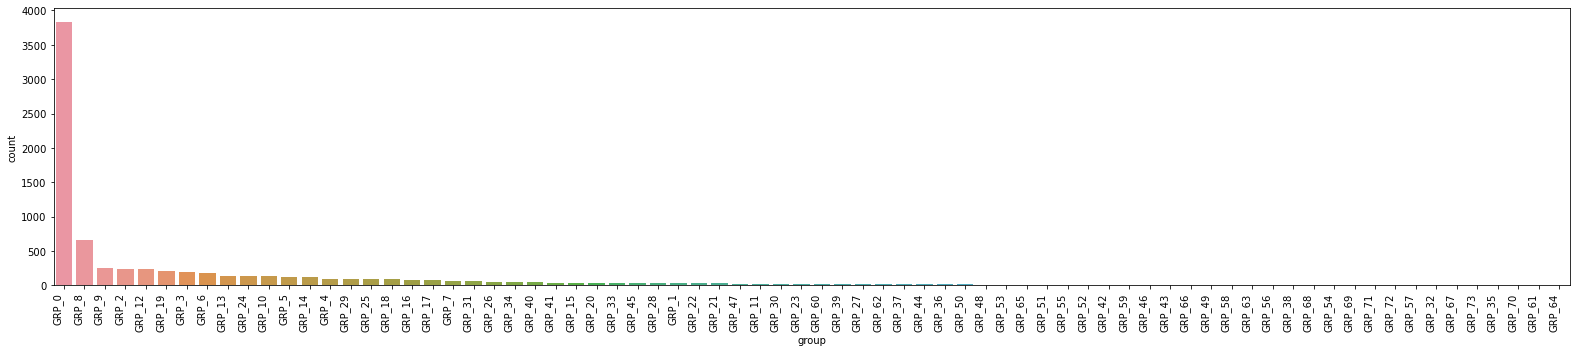

In [139]:
descending_order = df['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=df,order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [94]:
#convert all categories with less than 100 freq as 'Grouped_Assignment'
df['New_group'] = np.where(df.groupby('group')['group'].transform('size') < 200, 'Grouped_Assignment', df['group'])

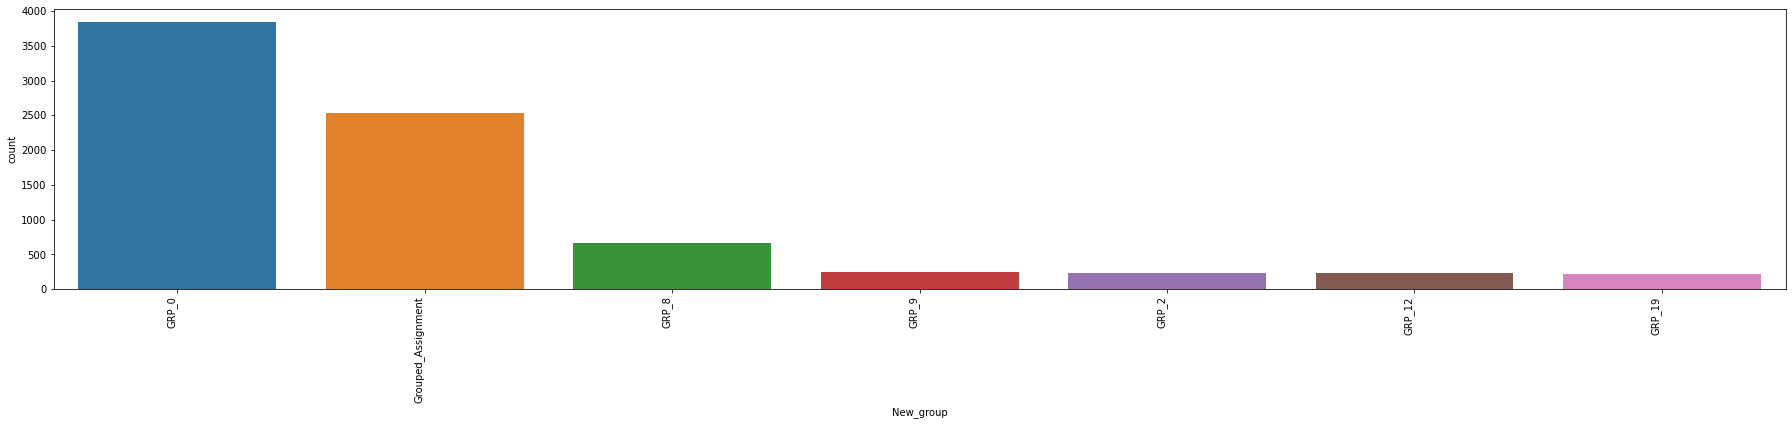

In [142]:
descending_order = df['New_group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(25,6))
#add code to rotate the labels
ax=sns.countplot(x='New_group', data=df,order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [95]:
train_x, test_x, train_y, test_y = train_test_split(df['merged_description'], df['New_group'], test_size = 0.25)

In [96]:
tfidf_vec = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000,ngram_range=(1,3))
tfidf_vec.fit(train_x)
xtrain_tfidf =  tfidf_vec.transform(train_x)
tfidf_vec.fit(test_x)
xtest_tfidf =  tfidf_vec.transform(test_x)

In [97]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed, Reshape,Dot
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical

In [98]:
clf = lgb.LGBMClassifier()
clf.fit(xtrain_tfidf, train_y)

LGBMClassifier()

In [99]:
y_pred=clf.predict(xtest_tfidf)

In [100]:
clf = XGBClassifier()
clf.fit(xtrain_tfidf, train_y)
y_pred=clf.predict(xtest_tfidf)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [101]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, test_y)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(test_y, y_pred)))

LightGBM Model accuracy score: 0.4792


In [102]:
accuracy=accuracy_score(y_pred, test_y)
print('XGboost accuracy score: {0:0.4f}'.format(accuracy_score(test_y, y_pred)))

XGboost accuracy score: 0.4792


In [103]:
max_features = 10000
maxlen = 40
embedding_size = 200
# define params
#NUM_WORDS = 20000
#EMBEDDING_DIM = 300
#MAX_LEN = 100

In [104]:
train = df.sample(frac=0.60, random_state=99)
test = df.loc[~df.index.isin(train.index), :]

In [105]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train['merged_description'])

In [106]:
X = tokenizer.texts_to_sequences(train['merged_description'])
X = pad_sequences(X, maxlen = maxlen)
y = pd.get_dummies(train['New_group'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", y.shape[1])

Number of Samples: 4777
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  16  28 240]
Number of Labels:  7


In [107]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(list(word_index.keys())[:100])

Found 7268 unique tokens.
['job', 'yes', 'na', 'password', 'ts', 'erp', 'user', 'tool', 'issue', 'scheduler', 'fail', 'company', 'ticket', 'sid', 'reset', 'unable', 'u', 'error', 'access', 'work', 'need', 'account', 'get', 'help', 'email', 'system', 'site', 'login', 'power', 'use', 'hostname', 'circuit', 'outlook', 'network', 'see', 'message', 'update', 'vendor', 'change', 'try', 'check', 'name', 'backup', 'able', 'new', 'server', 'log', 'telecom', 'phone', 'problem', 'type', 'order', 'start', 'call', 'time', 'connect', 'contact', 'open', 'request', 'team', 'lock', 'usa', 'printer', 'report', 'plant', 'send', 'crm', 't', 'attach', 'vpn', 'show', 'window', 'device', 'print', 'engineering', 'schedule', 'create', 'since', 'file', 'maintenance', 'outage', 'event', 'receive', 'screen', 'notify', 'pc', 'management', 'pm', 'skype', 'provider', 'sale', 'cert', 'maint', 'connection', 'resolve', 'platform', 'customer', 'collaboration', 'detail', 'could']


In [108]:
VOCAB_SIZE = len(word_index) + 1
VOCAB_SIZE

7269

In [109]:
EMBEDDING_FILE = 'glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


In [110]:
embedding_dim = 200

embedding_matrix = np.zeros((len(word_index)+1, embedding_dim))

for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [113]:
model = Sequential()
model.add(Embedding(len(word_index)+1,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))

model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.1,return_sequences=True)))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.1)))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))

model.add(Dense(7, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 40, 200)           1453800   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 40, 200)           0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 40, 128)           135680    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 7)               

In [114]:
epochs = 20
batch_size = 128

history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1)

Epoch 1/20
34/34 [==============================] - 19s 331ms/step - loss: 1.3021 - accuracy: 0.5415 - val_loss: 1.0289 - val_accuracy: 0.6255
Epoch 2/20
34/34 [==============================] - 10s 295ms/step - loss: 0.9761 - accuracy: 0.6404 - val_loss: 0.8982 - val_accuracy: 0.6506
Epoch 3/20
34/34 [==============================] - 10s 293ms/step - loss: 0.8645 - accuracy: 0.6804 - val_loss: 0.8229 - val_accuracy: 0.6674
Epoch 4/20
34/34 [==============================] - 11s 320ms/step - loss: 0.7744 - accuracy: 0.7262 - val_loss: 0.8006 - val_accuracy: 0.7071
Epoch 5/20
34/34 [==============================] - 11s 328ms/step - loss: 0.6970 - accuracy: 0.7539 - val_loss: 0.7631 - val_accuracy: 0.7280
Epoch 6/20
34/34 [==============================] - 11s 325ms/step - loss: 0.6260 - accuracy: 0.7755 - val_loss: 0.7388 - val_accuracy: 0.7259
Epoch 7/20
34/34 [==============================] - 11s 326ms/step - loss: 0.5382 - accuracy: 0.8072 - val_loss: 0.7428 - val_accuracy: 0.7280

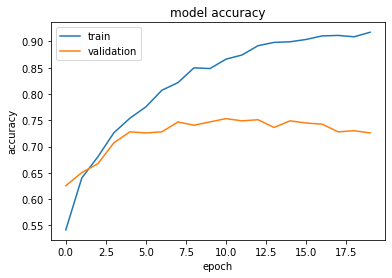

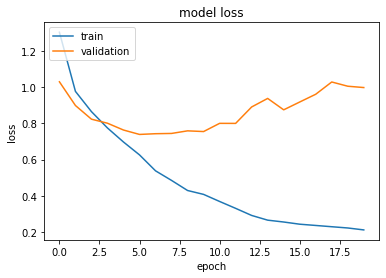

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [118]:
X_test = tokenizer.texts_to_sequences(test['merged_description'])
X_test = pad_sequences(X_test, maxlen = maxlen)

In [119]:
le = preprocessing.LabelEncoder()
le.fit(test['New_group'])
y_test=le.transform(test['New_group'])

In [120]:
word_index_test = tokenizer.word_index

In [121]:
y_hat = np.argmax(model.predict(X_test), axis=-1)

In [122]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1663
           1       0.55      0.62      0.58        89
           2       0.31      0.26      0.28        94
           3       0.32      0.65      0.43        51
           4       0.87      0.63      0.73       385
           5       0.18      0.73      0.29        22
           6       0.64      0.70      0.67       880

    accuracy                           0.74      3184
   macro avg       0.53      0.63      0.55      3184
weighted avg       0.76      0.74      0.74      3184



In [124]:
model = Sequential()
model.add(Embedding(len(word_index)+1,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))

model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.1,return_sequences=True)))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.1)))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))

model.add(Dense(7, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])


epochs = 50
batch_size = 128

history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1)

Epoch 1/50
34/34 [==============================] - 15s 186ms/step - loss: 1.4734 - accuracy: 0.5031 - val_loss: 1.1034 - val_accuracy: 0.6297
Epoch 2/50
34/34 [==============================] - 6s 172ms/step - loss: 1.0342 - accuracy: 0.6311 - val_loss: 0.9206 - val_accuracy: 0.6778
Epoch 3/50
34/34 [==============================] - 6s 179ms/step - loss: 0.9105 - accuracy: 0.6685 - val_loss: 0.8554 - val_accuracy: 0.6736
Epoch 4/50
34/34 [==============================] - 6s 172ms/step - loss: 0.8323 - accuracy: 0.7088 - val_loss: 0.8298 - val_accuracy: 0.6967
Epoch 5/50
34/34 [==============================] - 6s 163ms/step - loss: 0.7675 - accuracy: 0.7262 - val_loss: 0.7939 - val_accuracy: 0.7238
Epoch 6/50
34/34 [==============================] - 6s 164ms/step - loss: 0.7224 - accuracy: 0.7502 - val_loss: 0.7879 - val_accuracy: 0.7134
Epoch 7/50
34/34 [==============================] - 6s 185ms/step - loss: 0.6447 - accuracy: 0.7774 - val_loss: 0.8469 - val_accuracy: 0.7280
Epoch

In [125]:
y_hat_50 = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_hat_50,y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1695
           1       0.43      0.62      0.51        69
           2       0.32      0.25      0.28       100
           3       0.35      0.45      0.40        80
           4       0.84      0.62      0.72       374
           5       0.20      0.44      0.28        41
           6       0.61      0.72      0.66       825

    accuracy                           0.73      3184
   macro avg       0.52      0.56      0.53      3184
weighted avg       0.75      0.73      0.74      3184



In [126]:
seq_input = Input(shape=(maxlen,), dtype='int32')
embedded = Embedding(len(word_index)+1,
                     embedding_dim,
                     embeddings_initializer=Constant(embedding_matrix),
                     input_length=maxlen,
                     trainable=True)(seq_input)

embedded = Dropout(0.2)(embedded)

In [127]:
lstm1 = Bidirectional(LSTM(embedding_dim, return_sequences=True))(embedded)
lstm1 = Dropout(0.2)(lstm1)
lstm2 = Bidirectional(LSTM(embedding_dim, return_sequences=True))(lstm1)
lstm2 = Dropout(0.2)(lstm2)

In [128]:
att_vector = TimeDistributed(Dense(1))(lstm2)
att_vector = Reshape((maxlen,))(att_vector)
att_vector = Activation('softmax', name='attention_vec')(att_vector)

In [129]:
att_output = Dot(axes=1)([lstm2, att_vector])

In [130]:
fc = Dense(embedding_dim, activation='relu')(att_output)
output = Dense(7, activation='softmax')(fc)
model = Model(inputs=[seq_input], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 40, 200)      1453800     input_1[0][0]                    
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 40, 200)      0           embedding_12[0][0]               
__________________________________________________________________________________________________
bidirectional_12 (Bidirectional (None, 40, 400)      641600      dropout_6[0][0]                  
______________________________________________________________________________________________

In [131]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

history = model.fit(X, y, epochs=30, batch_size=128, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/30
34/34 - 44s - loss: 1.1920 - accuracy: 0.5708 - val_loss: 0.9379 - val_accuracy: 0.6506
Epoch 2/30
34/34 - 34s - loss: 0.8852 - accuracy: 0.6702 - val_loss: 0.8410 - val_accuracy: 0.6799
Epoch 3/30
34/34 - 35s - loss: 0.7481 - accuracy: 0.7167 - val_loss: 0.7403 - val_accuracy: 0.7134
Epoch 4/30
34/34 - 35s - loss: 0.6379 - accuracy: 0.7539 - val_loss: 0.7540 - val_accuracy: 0.7322
Epoch 5/30
34/34 - 35s - loss: 0.5438 - accuracy: 0.7944 - val_loss: 0.7532 - val_accuracy: 0.7301
Epoch 6/30
34/34 - 36s - loss: 0.4671 - accuracy: 0.8204 - val_loss: 0.7781 - val_accuracy: 0.7280
Epoch 7/30
34/34 - 37s - loss: 0.4040 - accuracy: 0.8439 - val_loss: 0.8848 - val_accuracy: 0.7259
Epoch 8/30
34/34 - 36s - loss: 0.3562 - accuracy: 0.8662 - val_loss: 0.8821 - val_accuracy: 0.7280
Epoch 9/30
34/34 - 36s - loss: 0.2984 - accuracy: 0.8846 - val_loss: 1.0250 - val_accuracy: 0.7301
Epoch 10/30
34/34 - 36s - loss: 0.2827 - accuracy: 0.8911 - val_loss: 0.9983 - val_accuracy: 0.7364
Epoch 11/

In [132]:
y_hat_att = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_hat_att,y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1659
           1       0.48      0.64      0.55        75
           2       0.23      0.30      0.26        60
           3       0.35      0.56      0.43        64
           4       0.84      0.64      0.72       365
           5       0.30      0.56      0.39        48
           6       0.65      0.69      0.67       913

    accuracy                           0.74      3184
   macro avg       0.53      0.60      0.55      3184
weighted avg       0.76      0.74      0.75      3184



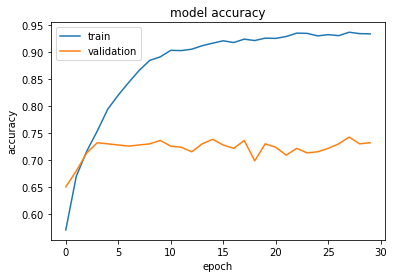

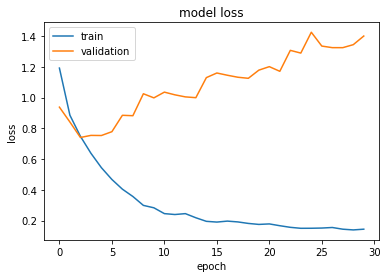

In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()